In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

# Create parameters

In [2]:
params, R = ob.ra_params(num_resources=50, num_agents=50, num_participants=500)

# Distributed solution with limited memory $m$

In [3]:
agents = ob.ra_agents(params=params)
g = ob.ra_coupling(agents, R)
prob = ob.Problem(agents = agents, g = g)

In [5]:
max_iter = 50
memory = [20, 30, max_iter]
memory_bounds = {}
for m in memory:
    prob.solve(rel_gap= 10**(-10), abs_gap=10**(-10), max_iter=max_iter, memory=m)
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=0, rel_gap=37.062887378750794, L=-97447.74542201954, U=-2560.1774361558623
k=1, rel_gap=0.7958550792154925, L=-4597.707652413403, U=-2560.1774361558623
k=2, rel_gap=0.2752824893355978, L=-4521.501885060705, U=-3545.4904484859167
k=3, rel_gap=0.14067799474212223, L=-4503.777611368758, U=-3948.3339138026813
k=4, rel_gap=0.09219746161897072, L=-4488.309524974918, U=-4109.430467199466
k=5, rel_gap=0.0748528242054505, L=-4478.516263630697, U=-4166.632084668236
k=6, rel_gap=0.06626662816086115, L=-4462.175308170514, U=-4184.858824539084
k=7, rel_gap=0.06152551695667362, L=-4449.418225667614, U=-4191.532049482724
k=8, rel_gap=0.05794013675373185, L=-4436.296657580221, U=-4193.334295069765
k=9, rel_gap=0.05272132329589143, L=-4420.506689131718, U=-4199.123349465235
k=10, rel_gap=0.04603140166875446, L=-4415.15511153705, U=-4220.862877054615
k=11, rel_gap=0.04112410462485364, L=-4410.009509317351, U=-4235.815393887554
k=12, rel_gap=0.03757767428329163, L=-4402.698252514542, U=-4243.2469025084

k=5, rel_gap=0.0748528242054505, L=-4478.516263630697, U=-4166.632084668236
k=6, rel_gap=0.06626662816086115, L=-4462.175308170514, U=-4184.858824539084
k=7, rel_gap=0.06152551695667362, L=-4449.418225667614, U=-4191.532049482724
k=8, rel_gap=0.05794013675373185, L=-4436.296657580221, U=-4193.334295069765
k=9, rel_gap=0.05272132329589143, L=-4420.506689131718, U=-4199.123349465235
k=10, rel_gap=0.046022361169588875, L=-4415.121446450847, U=-4220.867172967667
k=11, rel_gap=0.04095147417761922, L=-4411.438803579101, U=-4237.890922883087
k=12, rel_gap=0.037274675947458036, L=-4404.499433950406, U=-4246.2228531003975
k=13, rel_gap=0.03223657077537531, L=-4390.039647773416, U=-4252.93946374695
k=14, rel_gap=0.028763662851309546, L=-4385.1303881737, U=-4262.524568587428
k=15, rel_gap=0.02723718321770815, L=-4382.742852809492, U=-4266.534471699155
k=16, rel_gap=0.025415186556228757, L=-4379.472839564214, U=-4270.926447142165
k=17, rel_gap=0.02287231324155623, L=-4376.872641094392, U=-4279.001

# Centralized solution

In [3]:
h_cvx = ob.cvx_resource_allocation(params=params, R=R)[0]

# Plot

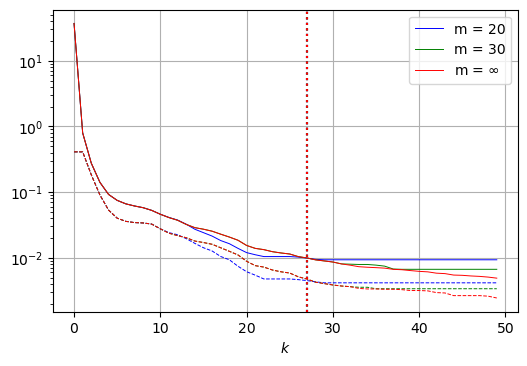

In [6]:
ob.plot_finite_memory(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx)